# 新型コロナウィルス感染症(CoVid-19)拡大状況を可視化・分析してみる（国内編）

# モジュールのインポートとデータの読み込み
まずは必要なモジュールをインポートする．
- `numpy`: 行列・ベクトル計算用
- `pandas`: データ分析用
- `datetime`: 日時の取扱い
- `matplotlib.pyplot`: 描画
- `matplotlib.dates`: グラフ中の日付の取扱い
- `japanize_matplotlib`: 日本語化（豆腐問題を回避）

In [1]:
# 必要なモジュールのインポート
import numpy as np # 行列計算
import pandas as pd # データ分析用
from matplotlib import pyplot as plt, dates as mdates # グラフ描画
import datetime as dt# 日付
%pip install japanize-matplotlib # japanize_matplotlib をインストール
import japanize_matplotlib # matplotlibの日本語化（豆腐回避⦆

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 23.8 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=66d22102330b8d37072072460b95be22a6c5315bc9438b6ed07720c9313ff556
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


# 県別のCoVid-19感染状況を可視化する
我が国でCoVid-19感染状況をインタラクティブに可視化したサイトとしては，下記のようなものがある：
- [国内の発生状況など](https://www.mhlw.go.jp/stf/covid-19/kokunainohasseijoukyou.html#h2_1) | 厚労省
- [新型コロナウィルス感染症対策](https://corona.go.jp/dashboard/)  | 内閣府
- [新型コロナウィルス 国内感染の状況](https://toyokeizai.net/sp/visual/tko/covid19/) | 東洋経済オンライン
- [COVID-19 Japan](https://www.stopcovid19.jp) | 福野泰介氏
- [新型コロナウイルス感染速報](https://covid-2019.live) | Su Wei
- [東京都新型コロナウィルス感染症対策サイト](https://stopcovid19.metro.tokyo.lg.jp)
- [新型コロナウィルス](https://www3.nhk.or.jp/news/special/coronavirus/data-widget/) | NHK 特設サイト
- [CoVid-19 感染状況の可視化](https://nagae.github.io/CoVid-19/) 

## 県別データの読込み
データ分析の練習として，県別の新型コロナウィルス感染症（CoVid19)の拡大状況を可視化してみよう． データソースとしては，厚生労働省の[オープンデータ](https://www.mhlw.go.jp/stf/covid-19/open-data.html)で公開されている下記のものを使おう．

- 新規陽性者数の推移（日別） https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
- 死亡者数（累積） https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv
- 入院治療等を要する者等推移 https://covid19.mhlw.go.jp/public/opendata/requiring_inpatient_care_etc_daily.csv
- 重症者数の推移 https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv

これらを Colab に取り込むには，上記のURL(`https://`で始まるアドレス)を [`pandas.read_csv`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)の引数に与える．　例えば，`new_cases` というデータフレームに新規陽性者数データを読み込むには，

```python
new_cases_url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv"
new_cases = pd.read_csv(new_cases_url)
new_cases # 表示
```

とする．どんな形でデータフレームに読込まれているか確認してみよう．


In [2]:
# 新規陽性者数を new_cases に取り込む
new_cases_url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv" # データの在処
new_cases = pd.read_csv(new_cases_url) # データフレームに取り込む
new_cases # 表示

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2022/7/8,50082,887,405,203,432,125,157,216,490,...,605,203,3068,683,555,1672,585,557,823,2417
905,2022/7/9,54993,911,499,304,513,128,150,281,485,...,654,221,3256,670,558,1643,641,666,953,2518
906,2022/7/10,54046,859,418,257,425,111,135,248,574,...,498,200,2757,529,592,1493,668,573,860,2458
907,2022/7/11,37124,602,439,181,186,106,97,186,496,...,258,99,2354,668,295,963,435,412,671,943


## 日付をインデックスに
データフレーム `new_cases` は インデックスが `0, 1, 2, ...` となっていて，そのままでは若干使い辛い．そこで `Date` 列に記載されている日付をインデックスにしよう．なお，`Date`列は単なる文字列になっているので [`pandas.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)という関数を使って日付オブジェクトにしておくと便利である（このあたりは若干テクニカルなので「おまじない」と思って実行すればよい）．

In [3]:
# 新規陽性者数を new_cases に取り込み，日付をインデックスにする
new_cases_url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv" # データの在処
new_cases = pd.read_csv(new_cases_url) # データフレームに取り込む
new_cases["Date"] = pd.to_datetime(new_cases["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
new_cases = new_cases.set_index("Date") # "Date"列をインデックスに設定
new_cases # 表示

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-08,50082,887,405,203,432,125,157,216,490,285,...,605,203,3068,683,555,1672,585,557,823,2417
2022-07-09,54993,911,499,304,513,128,150,281,485,297,...,654,221,3256,670,558,1643,641,666,953,2518
2022-07-10,54046,859,418,257,425,111,135,248,574,367,...,498,200,2757,529,592,1493,668,573,860,2458


## 他のデータも読み込んでみる
同様にすれば，累積死亡者数と重症者数も取り込める．

In [4]:
# 累積死亡者数データを読込む
deaths_url = "https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv" # データの在処
deaths = pd.read_csv(deaths_url) # データフレームに取り込む
deaths["Date"] = pd.to_datetime(deaths["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
deaths = deaths.set_index("Date") # "Date"列をインデックスに設定
# 重症者数
severe_url = "https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv" # データの在処
severe = pd.read_csv(severe_url) # データフレームに取り込む
severe["Date"] = pd.to_datetime(severe["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
severe = severe.set_index("Date") # "Date"列をインデックスに設定
# 表示
deaths, severe

(              ALL  Hokkaido  Aomori  Iwate  Miyagi  Akita  Yamagata  \
 Date                                                                  
 2020-05-09    613        48       0      0       1      0         0   
 2020-05-10    621        51       0      0       1      0         0   
 2020-05-11    643        56       0      0       1      0         0   
 2020-05-12    668        62       0      0       1      0         0   
 2020-05-13    687        68       0      0       1      0         0   
 ...           ...       ...     ...    ...     ...    ...       ...   
 2022-07-08  31395      2100     116     97     201     72        98   
 2022-07-09  31408      2101     116     97     202     72        98   
 2022-07-10  31418      2101     117     97     202     72        98   
 2022-07-11  31437      2102     117     97     202     72        98   
 2022-07-12  31457      2102     117     97     202     72        98   
 
             Fukushima  Ibaraki  Tochigi  ...  Ehime  Kochi  F

## 入院者数だけを取り出す
入院者のデータは，各県について「入院治療等を要する者(Requiring inpatient care)」「退院又は療養解除者(Discharged from hospital or released from treatment)」「確認中(To be confirmed)」の3つが記載されているため，そのままでは使い辛い． そこで，下記のセルを実行することで，各県の入院者数だけを取り出すことにしよう．

In [5]:
# 入院者数
hosp_url = "https://covid19.mhlw.go.jp/public/opendata/requiring_inpatient_care_etc_daily.csv" # データの在処
hosp_orig = pd.read_csv(hosp_url) # まずは全てのデータをデータフレーム hosp_orig に取り込む
hosp_orig["Date"] = pd.to_datetime(hosp_orig["Date"]) # "Date"の列を文字列から日付オブジェクトに変換
hosp_orig = hosp_orig.set_index("Date") # "Date"列をインデックスに設定

# 「入院治療等を要する者」だけのデータフレーム hosp を作成する
hosp = hosp_orig[["({}) Requiring inpatient care".format(pref) for pref in new_cases.columns]]
hosp.columns = new_cases.columns # 列の名前を全国("ALL")と47都道府県名にする

# 県別データの可視化


## データフレームの行・列へのアクセス方法
データフレーム `new_cases, deaths, hosp, severe` の特定の「列」にアクセスするには，
```
new_cases["Miyagi"]
```
のように，`【データフレーム】[【列名】]`とする． 列の要素は，
```
new_cases.columns
```
で確認できる．

In [6]:
print( new_cases.columns ) # データフレーム new_cases の列の要素を表示
print( new_cases["Miyagi"] ) # 宮城県の新規陽性数を表示

Index(['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata',
       'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo',
       'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi',
       'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 'Shiga', 'Kyoto', 'Osaka',
       'Hyogo', 'Nara', 'Wakayama', 'Tottori', 'Shimane', 'Okayama',
       'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi',
       'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki',
       'Kagoshima', 'Okinawa'],
      dtype='object')
Date
2020-01-16      0
2020-01-17      0
2020-01-18      0
2020-01-19      0
2020-01-20      0
             ... 
2022-07-08    432
2022-07-09    513
2022-07-10    425
2022-07-11    186
2022-07-12    730
Name: Miyagi, Length: 909, dtype: int64


同様に，特定の行にアクセスするには
```
deaths.loc['2022-07-11']
```
のように, `【データフレーム】.loc[【行名】]`とする． 詳細な仕様は[`pandas.DataFrame.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)を参照すること.

In [7]:
deaths.loc['2022-07-11'] # 2022年7月11日における全県の累積死亡者数を表示

ALL          31437
Hokkaido      2102
Aomori         117
Iwate           97
Miyagi         202
Akita           72
Yamagata        98
Fukushima      227
Ibaraki        452
Tochigi        279
Gunma          323
Saitama       1667
Chiba         1805
Tokyo         4587
Kanagawa      2243
Niigata         91
Toyama          96
Ishikawa       199
Fukui           46
Yamanashi       68
Nagano         205
Gifu           350
Shizuoka       423
Aichi         2105
Mie            317
Shiga          222
Kyoto          756
Osaka         5221
Hyogo         2255
Nara           392
Wakayama       118
Tottori         20
Shimane         20
Okayama        252
Hiroshima      495
Yamaguchi      181
Tokushima       86
Kagawa         131
Ehime          143
Kochi          116
Fukuoka       1284
Saga           111
Nagasaki       128
Kumamoto       312
Oita           167
Miyazaki       149
Kagoshima      214
Okinawa        493
Name: 2022-07-11 00:00:00, dtype: int64

## 累積感染者数と累積死亡者数の可視化

`new_cases["Miyagi"]`, `deaths["Miyagi"]` などとして得られた県別の感染者数と死亡者数を 「Colabグラフ描画」で説明した `matplotlib.pyplot.plot`関数などに与えれば，県別感染状況を可視化できる．このとき，`plot`関数に[`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)を与えると，各行の**インデックス**をx軸，各行の値をy軸とした折れ線グラフをプロットしてくれる（x軸/y軸をわざわざ与える必要がない）．

なお，`new_cases`に格納されているのは各日に発生した「新規」死亡者数であるのに対し， `deaths`には累積死亡者数が格納されていることに注意されたい． `new_cases`の新規感染者数を累積感染者数に直すには，下記のように [`padnas.DataFrame.cumsum`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html)関数を使う．
```
new_cases.cumsum() # 全県について累積感染者数を求める場合
new_cases["Miyagi"].cumsum() # 宮城県だけについて累積感染者数を求める場合
new_cases.cumsum()["Miyagi"] # こうしても良い
```


プロットしたグラフは savefig 関数を使って保存しておこう。

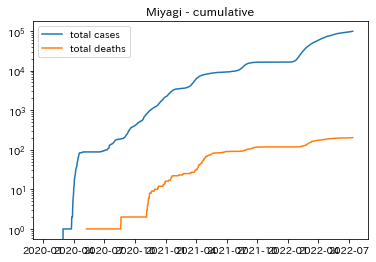

In [8]:
pref = "Miyagi" # 県名を pref に格納
plt.plot(new_cases[pref].cumsum(), label="total cases") # 累積陽性者
plt.plot(deaths[pref], label="total deaths") # 累積死亡者
plt.yscale('log') # y軸を対数で表示
plt.legend() # 凡例を表示
plt.title("{} - cumulative".format(pref)) # タイトルに県名を表示
plt.savefig('Miyagi.pdf') # savefig 関数を使ってグラフを保存（plt.show()の前に呼ぶこと）
plt.savefig('Miyagi.png') # savefig 関数を使ってグラフを保存（plt.show()の前に呼ぶこと

### 日付がゴチャる問題について
横軸に日付をずらりと表示するとゴチャゴチャするので，[`matplotlib.dates`](https://matplotlib.org/3.1.1/api/dates_api.html)を使って，**主目盛り**に対して以下の操作を行なうことにしよう．
- 月単位にする  
```set_major_locator( mdates.MonthLocator() )```
- ラベルを「22 Jul」のようにする  
```set_major_formatter(mdates.DateFormatter("%y %b")```
- グリッドを薄い水色で表す  
```grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5)```

さらに，この操作は何度も使うので，`fancy_ax`というオリジナルの**関数**として定義しておく．

ここは若干テクニカルなので，詳細に踏み込みたくない人は**おまじない**だと思って，とにかく使っていこう．

In [9]:
#
# x軸の目盛りの見栄えを修正する関数を定義する
#
def fancy_ax(ax):
    ## x軸の主目盛りを修正
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)
    ## x軸の副目盛りを修正（今回は使わないのでコメントアウトしてある⦆
    #ax.xaxis.set_minor_locator(mdates.WeekdayLocator()) # 副目盛りを週ごとに設定
    #ax.grid(which='minor', axis='x', linestyle='--') # 副目盛りのグリッドの線種を点線にする
    return ax

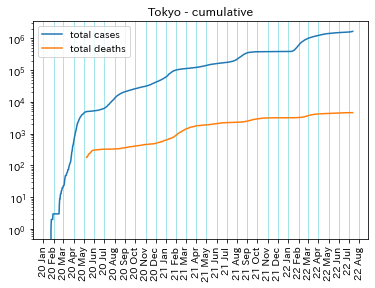

In [10]:
pref = "Tokyo" # 県名を pref に格納
plt.plot(new_cases[pref].cumsum(), label="total cases") # 該当する県の累積陽性者
plt.plot(deaths[pref], label="total deaths") # 該当する県の累積死亡者
plt.yscale('log') # y軸を対数で表示
plt.legend() # 凡例を表示
plt.title("{} - cumulative".format(pref)) # タイトルに県名を表示
fancy_ax(plt.gca()) # 現在表示されているグラフの軸 (plt.gca()) を取得し， fancy_ax に渡す（x軸を整形)
plt.savefig('Miyagi.pdf') # savefig 関数を使ってグラフを保存（plt.show()の前に呼ぶこと）
plt.savefig('Miyagi.png') # savefig 関数を使ってグラフを保存（plt.show()の前に呼ぶこと

## 日次新規陽性数/死亡数
一日あたりの新規増加数もプロットしよう．累積死亡者数から一日あたりの新規死亡者数を求めるには,
```
death.diff()
```
とする．次のセルでは，日々の新規感染者数と死亡者数を，それぞれ， `nc`と `nd` という変数に格納した上で， ，[`pyplot.fill_between`関数](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html)を用いてプロットしている．

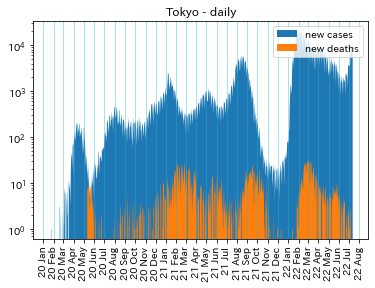

In [11]:
# 県別の新規陽性数と死亡数をプロット
pref = "Tokyo"
# 陽性数と死亡数を取得
nc = new_cases[pref] # 新規陽性者数
nd = deaths[pref].diff() # 新規死亡者数

# 新規件数をプロット
plt.fill_between(nc.index, nc, label="new cases") # 陽性者
plt.fill_between(nd.index, nd, label="new deaths") # 死亡者
plt.yscale('log') # y軸を対数で表示

ax = fancy_ax(plt.gca()) # ｘ軸の見栄えを整える

# グラフのタイトルと凡例を表示
plt.title("{} - daily".format(pref)) # 県名をタイトルに表示
plt.legend() # 凡例を表示
plt.show()

日次データは変動が激しい上に曜日の影響を受けやすい（土日は検査がないので報告症例数が小さくなりがち）ためにトレンドを掴みづらい．そこで，[`rolling`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)と[`mean`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)を使って，7日間平均をとってみよう．`new_cases`に対して`rolling(7).mean()`を行うと，次のようなデータが作られる．

|年月日|`new_cases`|`new_cases.rolling(7).mean()`| 
|---|---|---|
|2020-03-12|     2.0| NaN （データなし）| 
|2020-03-13|     2.0|NaN |
|2020-03-14|    10.0|NaN |
|2020-03-15|     3.0|NaN |
|2020-03-16|     0.0|NaN |
|2020-03-17|   12.0|NaN |
|2020-03-18|     9.0|  5.428571 （3/12-18の7日間の平均値）|
|2020-03-19|     7.0| 6.142857 (3/13-19の平均値)|
|2020-03-20|    11.0| 7.428571 (3/14-20の平均値)|

次のセルでは，陽性数と死亡数のそれぞれの7日間移動平均をプロットしている．

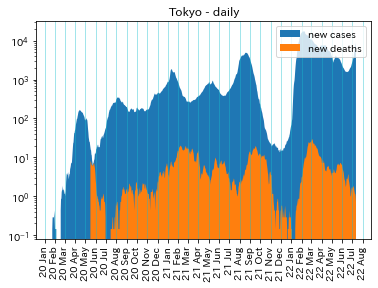

In [12]:
# 県別の新規陽性数と死亡数をプロット（7日間移動平均） 
pref = "Tokyo" # 県名

# 陽性数と死亡数を取得
nc = new_cases[pref] # 新規陽性者数
nd = deaths[pref].diff() # 新規死亡者数
tw = 7 # 移動平均を取る日数
nc = nc.rolling(tw).mean() # 新規陽性者数 nc を7日間移動平均で上書き
nd = nd.rolling(tw).mean() # 新規死亡者数 nd を7日間移動平均で上書き

# 新規件数をプロット
plt.fill_between(nc.index, nc, label="new cases") # 陽性者
plt.fill_between(nd.index, nd, label="new deaths") # 死亡者
plt.yscale('log') # y軸を対数で表示

ax = fancy_ax(plt.gca()) # ｘ軸の見栄えを整える

# グラフのタイトルと凡例を表示
plt.title("{} - daily".format(pref)) # 県名をタイトルに表示
plt.legend() # 凡例を表示
plt.show()

## 陽性数/死亡数の累積件数と日次新規件数
累積件数と日々の新規件数を並べてプロットしてみよう．次のセルでは，日々の新規件数を描画する`fill_between`関数に `alpha=0.25` というオプションを指定して透過している．

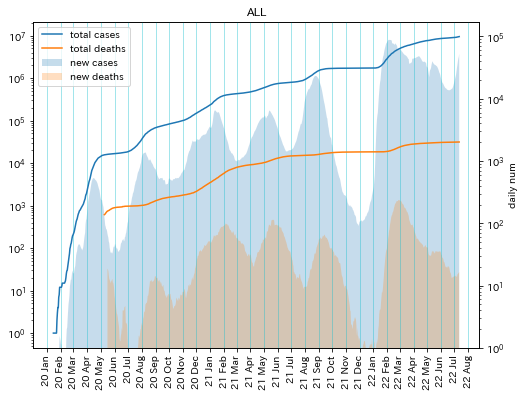

In [13]:
# 全国の累積陽性数/死亡数と新規陽性数/死亡数をまとめてプロット
pref = "ALL"

# グラフを描画するためのキャンバスを準備する
fig, ax1 = plt.subplots(1,1, figsize=(8,6))

# 累積陽性数と死亡数を取得
cc = new_cases[pref].cumsum() # 累積陽性数
cd = deaths[pref] # 累積死亡数

# y1軸に累積陽性数/死亡者数をプロット
ax1.plot(cc, label="total cases") # 該当する県の累積陽性者
ax1.plot(cd, label="total deaths") # 該当する県の累積死亡者
ax1.set_yscale('log') # y軸を対数で表示

# 新規陽性数と死亡数の移動平均を取る
tw = 7 # 移動平均をとる日数
nc = new_cases[pref].rolling(tw).mean() # 新規陽性数の移動平均
nd = deaths[pref].diff().rolling(tw).mean() # 新規死亡数の移動平均

# y2軸に日次新規件数（の移動平均）をプロット
ax2 = plt.twinx(ax1) # y2軸を用意する
ax2.fill_between(nc.index, nc, label="new cases", alpha=0.25) # 陽性者
ax2.fill_between(nd.index, nd, label="new deaths", alpha=0.25) # 死亡者
ax2.set_yscale('log') # y2軸を線形スケールにする
ax2.set_ylim(1,) # y2軸の表示下限を0にする
ax2.set_xticks([]) # x2軸は表示しない
ax2.set_ylabel("daily num") # y2軸のラベル

# y1軸をy2軸の上に表示させる（おまじない）
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1 = fancy_ax(ax1) # ｘ1軸の見栄えを整える

# グラフのタイトルと凡例を表示
ax1.set_title(pref) # 県名をグラフのタイトルに表示
h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない
plt.show()

## 県別死亡者数の棒グラフ
県別の死亡者数の棒グラフを描くには，ちょっとマニアックな方法を使う．次のセルでは，以下を行っている：
1. 累積死亡者数 `deaths` の最終行を `death.iloc[-1]` で取得
2. 得られた行には全国の列("ALL")が含まれているのでそれ以外の列を `loc["Hokkaido":]` で取得する
3. 得られた値を `sort_values(ascending=False)` で大きい順にソートする
4. 得られた Series を [`pyplot.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)関数に渡して棒グラフをプロットする
5. グラフの見栄えをよくするための小細工を施す（x軸のラベルを90度回転させたり，横軸をうまいこと合わせたりする）

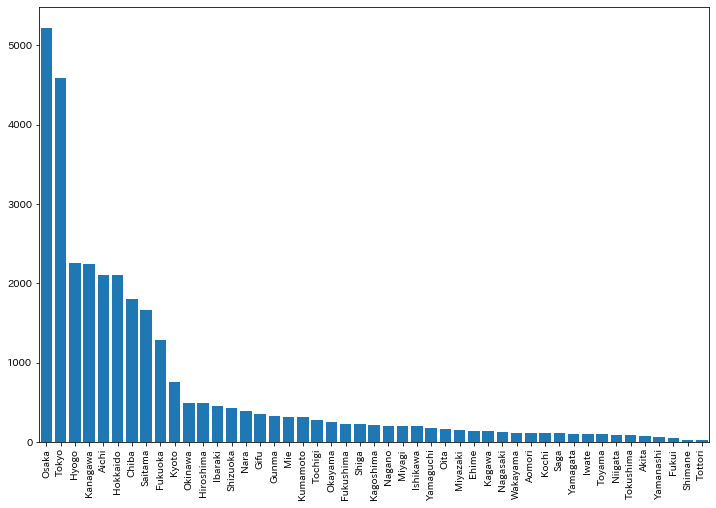

In [14]:
latest_deaths = deaths.iloc[-1] # 累積死亡者数 deaths の最終行を death.iloc[-1] で取得
latest_deaths = latest_deaths.loc["Hokkaido":] # "ALL"の列を取除く
latest_deaths = latest_deaths.sort_values(ascending=False) # 大きい順にソート
fig, ax = plt.subplots(1, 1, figsize=(12,8)) # グラフを描画するキャンバスを準備
ax.bar(latest_deaths.index, latest_deaths) # 棒グラフをプロット
# 以下はグラフを整形するための小細工
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10) # 副目盛りラベルを90度回転させる
ax.set_xlim(-0.5,46.5) # 横軸をうまいこと合わせる
plt.show() # グラフを表示

実は，[`pandas.DataFrame.plot.bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)関数を使うと，同じことを一行で実行できたりする

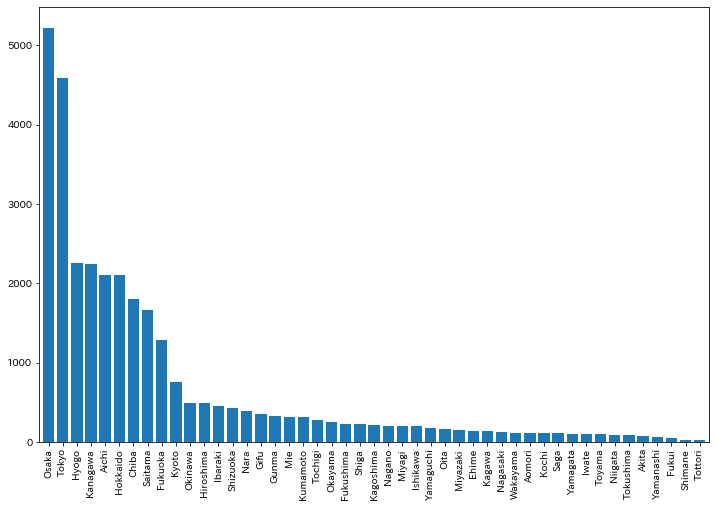

In [15]:
# 1ライナーで県別死亡者の棒グラフをプロットする
ax = deaths.iloc[-1].loc["Hokkaido":].sort_values(ascending=False).plot.bar(width=0.8, figure=plt.figure(figsize=(12,8)))

何のグラフだか判らなくなるので，タイトルを忘れないように．ここでは，集計期間も記載してみた．

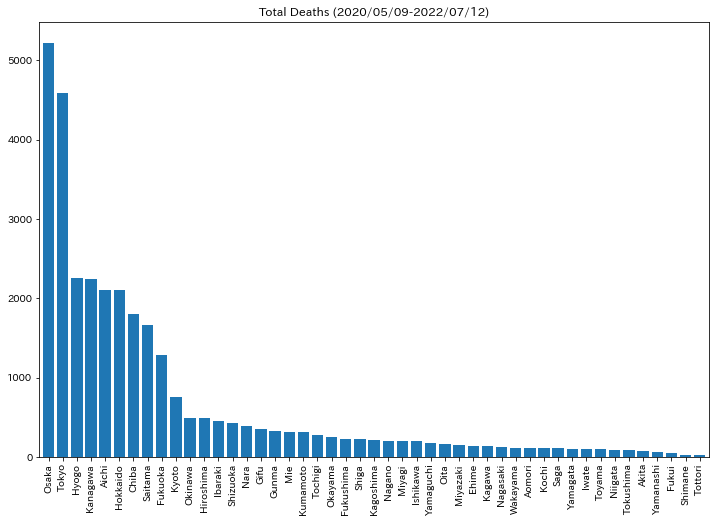

In [16]:
# 1ライナーで県別死亡者の棒グラフをプロットする
ax = deaths.iloc[-1].loc["Hokkaido":].sort_values(ascending=False).plot.bar(width=0.8, figure=plt.figure(figsize=(12,8)))
# タイトルを記載
first_date_str = deaths.index[0].strftime("%Y/%m/%d") # データ取得開始日
last_date_str = deaths.index[-1].strftime("%Y/%m/%d") # 最新データ取得日
ax.set_title("Total Deaths ({}-{})".format(first_date_str, last_date_str)) # タイトルを記載する
plt.show() # グラフの描画

## 別のデータと組み合わせてみる
厚労省のオープンデータで公開されている「入院治療等を要する者」には，自宅や宿泊療養施設等で療養する人も含まれている．このため，入院病床が逼迫しているかどうかの判断には使えない．例えば，下の2つのダッシュボードのうち，前者は「入院治療などを要する人数」で，後者は「実際に入院している人数」で計算された「逼迫度合い」が示されている．もちろん，現状に近いのは後者だろう．
1. https://www.stopcovid19.jp/
2. https://www.stopcovid19.jp/mhlw-beds.html

実際の入院患者数は，厚労省の[療養状況等及び入院患者受入病床数等に関する調査について
](https://www.mhlw.go.jp/stf/seisakunitsuite/newpage_00023.html)というサイトでオープンになっているが，週ごとに別々のファイルになっていて大変に使い辛い． そこで，これをまとめた CSV を下記からダウンロードして使うことにする：
https://www.stopcovid19.jp/data/covid19japan_beds/all.csv

In [17]:
# read_csv を使って CSV 形式のデータを読込む
hospitalized = pd.read_csv('https://www.stopcovid19.jp/data/covid19japan_beds/all.csv')
# 更新日を日付データに置き換える
hospitalized["更新日"] = pd.to_datetime(hospitalized["更新日"])
# なぜか未来の日付のデータが混入しているので取除く
hospitalized = hospitalized[hospitalized["更新日"]<=dt.datetime.today()]
# fillna(0)でデータ欠損部分をゼロ埋めし，整数型に変換する
hospitalized["入院者数"] = hospitalized["入院者数"].fillna(0).astype(int)
# 更新日でグループ化して和を取ることで，日付別の全国の入院者数を取得する
hospitalized = hospitalized.groupby("更新日").sum()["入院者数"]
hospitalized # 表示

更新日
2020-05-01    5514
2020-05-07    4436
2020-05-15    3396
2020-05-21    2058
2020-05-27    1369
              ... 
2022-06-08    6505
2022-06-15    5237
2022-06-22    4862
2022-06-29    5028
2022-07-06    6999
Name: 入院者数, Length: 112, dtype: int64

こうして読み取った入院者数を，累積陽性数および重症者数と組み合わせた新しいデータフレームを作る．

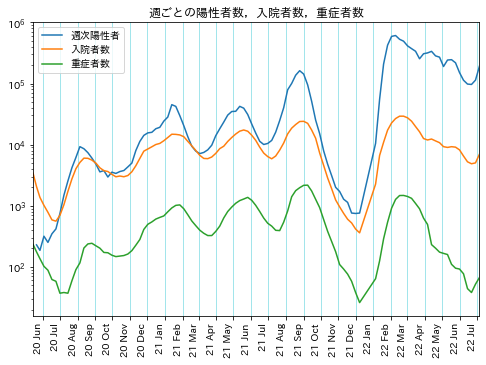

In [18]:
# pd.concat( [] ,axis=1)を使うことで，3つのデータを日付をインデックスで横(列方向)に連結させる．
df = pd.concat([new_cases.cumsum()["ALL"],
               hospitalized, 
               severe["ALL"]], axis=1)
# 欠損値のある行を dropna() で削除する(入院者は週次単位のデータしかないので，それに合わせる)
df = df.dropna().astype(int)
# 扱い易いように列の名前を上書きする
df.columns = ["陽性者数", "入院者数", "重症者数"]

# グラフを描画するキャンバスを準備
fig, ax = plt.subplots(1,1,figsize=(8,6))
df["陽性者数"].diff().plot(ax=ax, label="週次陽性者") # 1週間ごとの累積陽性者の diff() を取ることで得た週次陽性者をプロット．
df.loc[:,["入院者数", "重症者数"]].plot(ax=ax) # 入院者，重症者をプロット

# グラフを整形
ax.set_yscale('log') # y軸を対数スケール
ax.set_title("週ごとの陽性者数，入院者数，重症者数") # グラフのタイトル
ax.legend() # 凡例を表示
ax.set_xlim( df.index[[0,-1]] ) # 表示範囲を調整
fancy_ax(ax) # x軸の見栄えを整える
plt.show()

## オミクロンは本当に重症化しないのか？
一般的には，感染症は変異するほど感染力が強くなり，毒性が弱まる（というか宿主がすぐ死んでしまうほど毒性の強い変異は広がりづらい)．では，いま流行り(?)のオミクロンBA.5/4株はどうなのだろうか？　入院/重症化し易さを厳密に評価することは難しいので，ここでは「過去2週間の間に発生した陽性者数あたりの入院/重症者数」をプロットしてみよう．

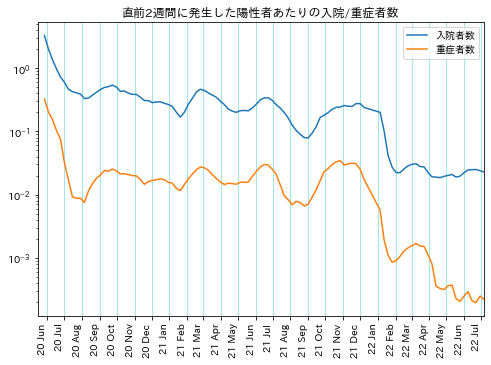

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,6)) # キャンバスを準備
cases2w = df["陽性者数"].diff(2) # 過去2週間に発生した陽性者数
( df["入院者数"]/cases2w ).plot(ax=ax, label="入院者数") # 2週間陽性者あたり入院者をプロット
( df["重症者数"]/cases2w ).plot(ax=ax, label="重症者数") # 2週間陽性者あたり重症者をプロット

# グラフを整形
ax.set_yscale('log') # y軸を対数スケール
ax.set_title("直前2週間に発生した陽性者あたりの入院/重症者数") # グラフのタイトル
ax.legend() # 凡例を表示
ax.set_xlim( df.index[[0,-1]] ) # 表示範囲を調整
fancy_ax(ax) # x軸の見栄えを整える
plt.show()

# 複数の県のデータを一枚のキャンバスにプロットする
Python プログラミングで学んだ `for` を使った繰り返し と [pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)関数を組み合わせることで，複数の県のデータをタイル状に並べてプロットできる． 

次のセルは，いくつかの県と，全国集計値についてのグラフをタイル状に配置している．47都道府県全てのデータをプロットするには，最初の行にあるpref_setの定義を `pref_set = new_cases.columns` に変えれば良い（実行にはかなり時間がかかる）．

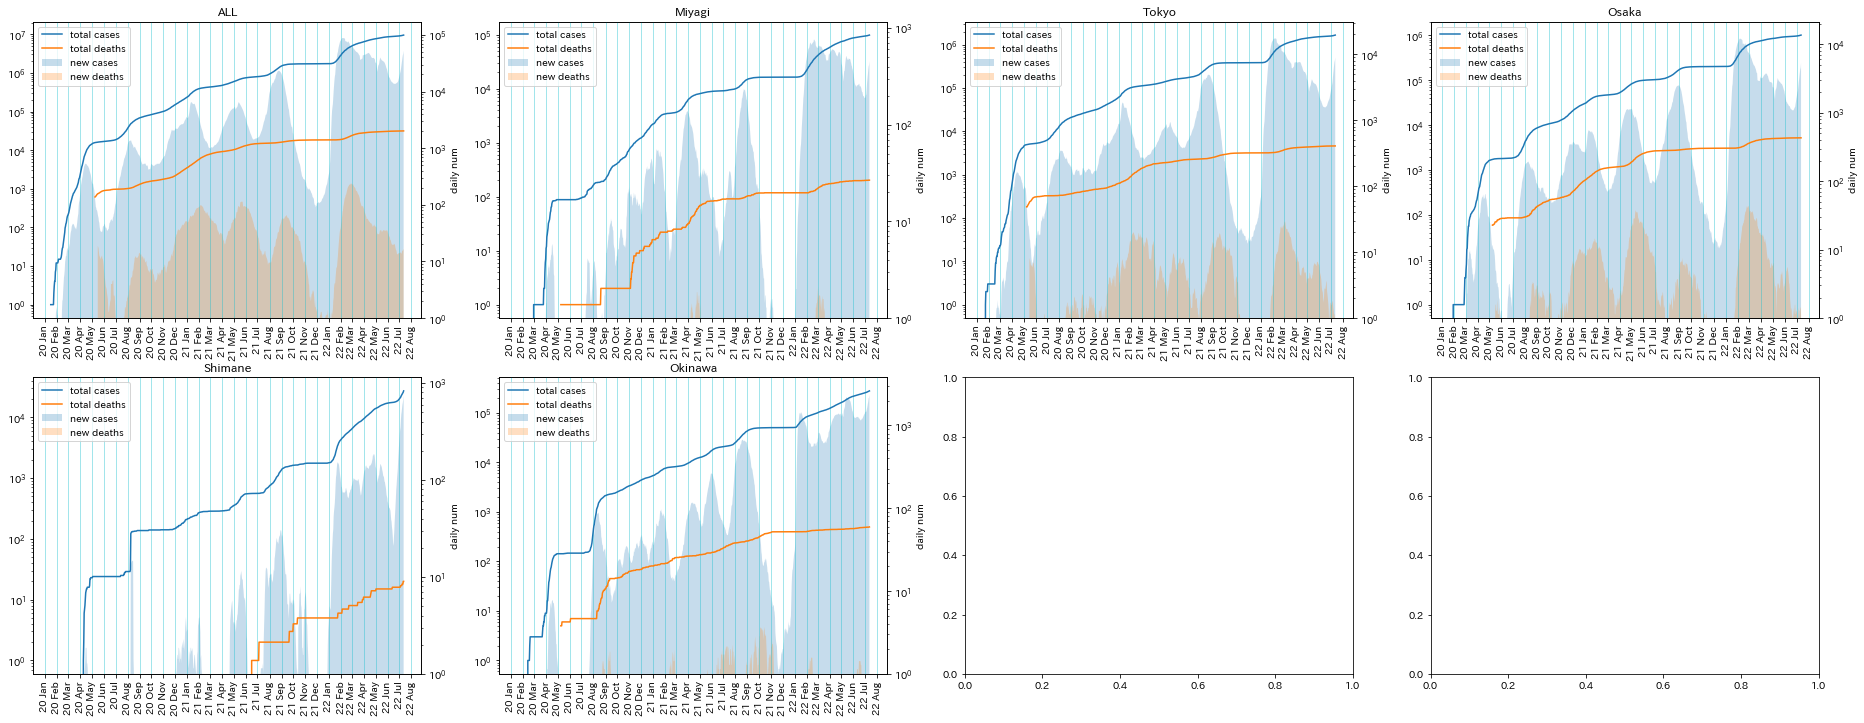

In [20]:
# 全国の累積陽性数/死亡数と新規陽性数/死亡数をまとめてプロット
pref_set = ["ALL", "Miyagi", "Tokyo", "Osaka", "Shimane", "Okinawa"]

# グラフをタイル状に配置して描画するためのキャンバスを準備する
cols = 4 # 1つの行に並べるタイルの数
rows = np.ceil(len(pref_set)/cols).astype(int) # 必要となる行の数
fig, ax_tab = plt.subplots(rows, cols, figsize=(8*cols, 6*rows)) # グラフを描画するタイルごとに軸オブジェクトを準備
axs = ax_tab.flatten() # 軸オブジェクトの行列 ax_tab を1次元に並べておく(後で便利)

# pref_set 内の各県についてグラフを表示する
for pid, pref in enumerate(pref_set): # こうすると, pid にはインデックスが, pref には pref_set の要素が順に代入される
    # グラフを表示する軸を取得
    ax1 = axs[pid] # 「pid 番目のタイル」の軸オブジェクトを取得

    # ここから下のコードは，「特定の県のデータをプロットする」コードと同じ．
    # 累積陽性数と死亡数を取得
    cc = new_cases[pref].cumsum() # 累積陽性数
    cd = deaths[pref] # 累積死亡数

    # y1軸に累積陽性数/死亡者数をプロット
    ax1.plot(cc, label="total cases") # 該当する県の累積陽性者
    ax1.plot(cd, label="total deaths") # 該当する県の累積死亡者
    ax1.set_yscale('log') # y軸を対数で表示

    # 新規陽性数と死亡数の移動平均を取る
    tw = 7 # 移動平均をとる日数
    nc = new_cases[pref].rolling(tw).mean() # 新規陽性数の移動平均
    nd = deaths[pref].diff().rolling(tw).mean() # 新規死亡数の移動平均

    # y2軸に日次新規件数（の移動平均）をプロット
    ax2 = plt.twinx(ax1) # y2軸を用意する
    ax2.fill_between(nc.index, nc, label="new cases", alpha=0.25) # 陽性者
    ax2.fill_between(nd.index, nd, label="new deaths", alpha=0.25) # 死亡者
    ax2.set_yscale('log') # y2軸を線形スケールにする
    ax2.set_ylim(1,) # y2軸の表示下限を0にする
    ax2.set_xticks([]) # x2軸は表示しない
    ax2.set_ylabel("daily num") # y2軸のラベル

    # y1軸をy2軸の上に表示させる（おまじない）
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    ax1 = fancy_ax(ax1) # ｘ1軸の見栄えを整える

    # グラフのタイトルと凡例を表示
    ax1.set_title(pref) # 県名をグラフのタイトルに表示
    h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
    h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
    ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない
plt.show()